In [3]:
from google.colab import files
uploaded = files.upload()

Saving scaled_heart.csv to scaled_heart.csv


In [4]:
import pandas as pd
df_scaled = pd.read_csv("scaled_heart.csv")

print(df_scaled.shape)
df_scaled.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1,1,0.481132,0.244292,1,2,0.603053,0,0.370968,3,0.000000,6.0,0
1,0.791667,1,4,0.622642,0.365297,0,2,0.282443,1,0.241935,2,1.000000,3.0,2
2,0.791667,1,4,0.245283,0.235160,0,2,0.442748,1,0.419355,2,0.666667,7.0,1
3,0.166667,1,3,0.339623,0.283105,0,0,0.885496,0,0.564516,3,0.000000,3.0,0
4,0.250000,0,2,0.339623,0.178082,0,2,0.770992,0,0.225806,1,0.000000,3.0,0


In [5]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Initialize PCA
pca = PCA()
# Fit PCA on scaled features (excluding num)
X_pca = pca.fit(df_scaled.drop(columns=["num"]))
# Convert to DataFrame for easy use
explained_vars = np.cumsum(pca.explained_variance_ratio_)

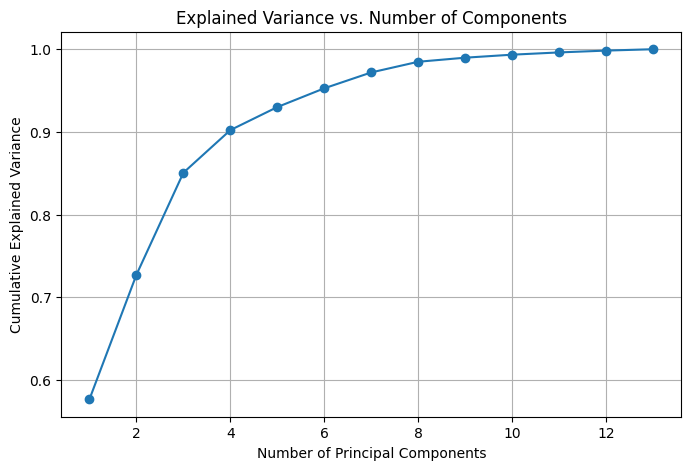

In [8]:
# Plot cumulative explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_vars)+1), explained_vars, marker="o")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

In [9]:
# Print threshold-based choice
for i, ev in enumerate(explained_vars, 1):
    if ev >= 0.95:  # 95% threshold
        print(f"\t\t\t Optimal number of components: {i} (explains {ev:.2%} of variance)")
        break

			 Optimal number of components: 6 (explains 95.27% of variance)


In [10]:
pca_final = PCA(n_components=6)
pca_transformed = pca_final.fit_transform(df_scaled.drop(columns=["num"]))
pca_df = pd.DataFrame(pca_transformed,columns=[f"PC{i+1}" for i in range(6)])
pca_df['num']= df_scaled['num'].values
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,num
0,1.056886,0.142561,-2.600496,1.342875,0.050053,-0.304071,0
1,-1.326260,1.587145,0.731607,0.421820,0.704721,0.185356,2
2,2.536460,1.117879,0.113120,0.076922,0.263847,0.219620,1
3,-1.590258,-0.653678,0.456804,1.536742,0.368943,-0.776991,0
4,-2.009211,0.566347,-1.179671,-0.391098,-0.499298,0.308367,0
...,...,...,...,...,...,...,...
298,1.853549,-1.942554,-1.925421,0.483286,-0.024938,-0.103133,1
299,2.415159,-0.771217,0.710594,0.212605,-0.140310,-0.568127,2
300,2.465558,-0.728017,0.895206,0.289730,0.330547,0.221252,3
301,-1.897136,0.715535,-1.155209,0.528155,-0.535736,0.102184,1


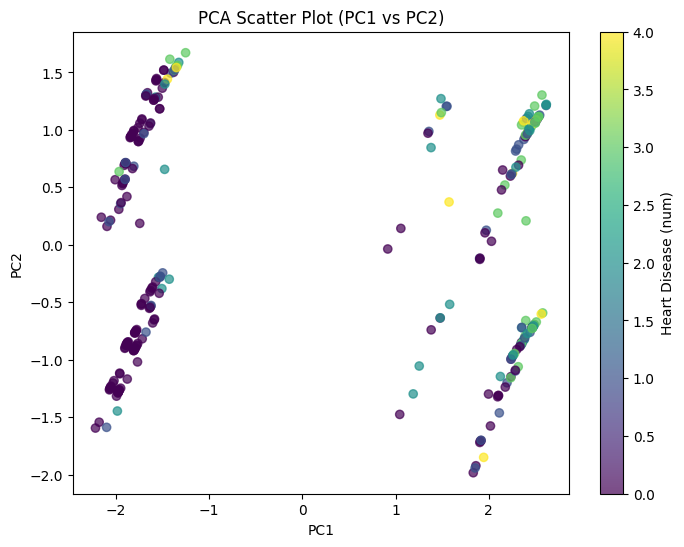

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["num"], cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Scatter Plot (PC1 vs PC2)")
plt.colorbar(label="Heart Disease (num)")
plt.show()

In [15]:
pca_df.to_csv("heart_pca.csv", index=False)